In [1]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 1.2/192.3 MB 25.6 MB/s eta 0:00:08
   ---------------------------------------- 2.3/192.3 MB 20.9 MB/s eta 0:00:10
    --------------------------------------- 3.9/192.3 MB 27.4 MB/s eta 0:00:07
    --------------------------------------- 4.8/192.3 MB 25.4 MB/s eta 0:00:08
   - -------------------------------------- 5.6/192.3 MB 23.7 MB/s eta 0:00:08
   - -------------------------------------- 6.0/192.3 MB 21.3 MB/s eta 0:00:09
   - -------------------------------------- 6.2/192.3 MB 19.0 MB/s eta 0:00:10
   - -------------------------------------- 6.5/192.3 MB 17.4 MB/s eta 0:00:11
   - -------------------------------------- 6.8/192.3 MB 16.2 MB/s eta 0:00:12
   - ---------

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
batch_size=4
block_size=8
max_iters=10000
eval_iters=250
learning_rate=3e-4
dropout=0.2
device= 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
with open("wizard_of_oz.txt",'r',encoding="utf-8") as f:
    text=f.read()

In [14]:
print(text[:6000])

﻿The Project Gutenberg eBook of The Wonderful Wizard of Oz
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Wonderful Wizard of Oz


Author: L. Frank Baum

Release date: February 1, 1993 [eBook #55]
                Most recently updated: March 30, 2021

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK THE WONDERFUL WIZARD OF OZ ***
[Illustration]




The Wonderful Wizard of Oz

by L. Frank Baum


This book is dedicated to my good friend & comrade
My Wife
L.F.B.


Contents

 Introduction
 Chapter I. The Cyclone
 Chapter II. The Council with the Munchkins
 Chapter III. Ho

In [15]:
chars=sorted(set(text))

In [56]:
print(chars)
vocab_size=len(chars)

['\n', ' ', '!', '#', '$', '%', '&', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”', '•', '™', '\ufeff']


In [23]:
string_to_int={ch:i for i,ch in enumerate(chars)}
int_to_string={i:ch for i,ch in enumerate(chars)}
encode= lambda s: [string_to_int[c] for c in s]
decode= lambda l:"".join([int_to_string[i] for i in l])

encode_hello=encode("Hello")
print(encode_hello)
print(decode(encode_hello))

[34, 59, 66, 66, 69]
Hello


In [24]:
#Right now we are using the token level tokenizer. We have a small vocal and small amount of tokens to encode. 
# If we work with word level tokenizer, then we have every single word of the english language and the tokens will be in huge amount.
# If we have a subword tokenizer, we will have somewhere between char level and word level toeknizer

In [26]:
#make our data element or text data to torch tensors
data=torch.tensor(encode(text), dtype=torch.long)

In [29]:
print(data[:100])

tensor([88, 46, 62, 59,  1, 42, 72, 69, 64, 59, 57, 74,  1, 33, 75, 74, 59, 68,
        56, 59, 72, 61,  1, 59, 28, 69, 69, 65,  1, 69, 60,  1, 46, 62, 59,  1,
        49, 69, 68, 58, 59, 72, 60, 75, 66,  1, 49, 63, 80, 55, 72, 58,  1, 69,
        60,  1, 41, 80,  0,  1,  1,  1,  1,  0, 46, 62, 63, 73,  1, 59, 56, 69,
        69, 65,  1, 63, 73,  1, 60, 69, 72,  1, 74, 62, 59,  1, 75, 73, 59,  1,
        69, 60,  1, 55, 68, 79, 69, 68, 59,  1])


In [30]:
len(data)#Tensors

227100

In [31]:
len(text)#words

227100

In [32]:
#Train and validation sets
#To make sure that the generations are unique and are not the copy of the whole document
#To give text like sheakepeare like text and not exactly shekspeare text

#Why is it called the bigram language model
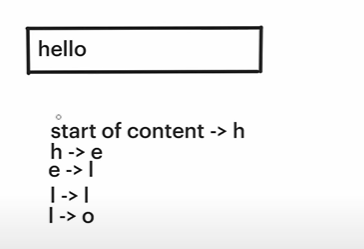

How can we make it to learn
block size- take a random snipit of the entire corpus and make targets and inputs out of that.
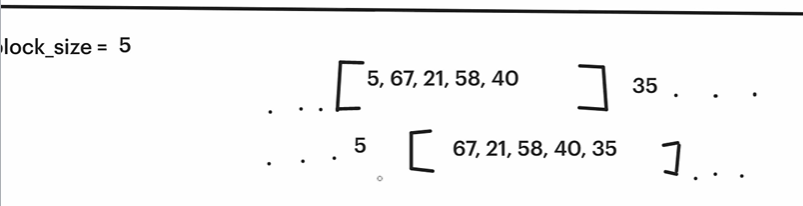
Targets are offset by 1



In [34]:
n=int(0.9*len(data))
train_data=data[:n]
val_data=data[n:]

In [38]:
block_size=8

x=train_data[:block_size]
y=train_data[1:block_size+1]

for t in range(block_size):
    context=x[:t+1]
    target=y[t]
    
    print(f"when the input is {context}, the target is {target}")

when the input is tensor([88]), the target is 46
when the input is tensor([88, 46]), the target is 62
when the input is tensor([88, 46, 62]), the target is 59
when the input is tensor([88, 46, 62, 59]), the target is 1
when the input is tensor([88, 46, 62, 59,  1]), the target is 42
when the input is tensor([88, 46, 62, 59,  1, 42]), the target is 72
when the input is tensor([88, 46, 62, 59,  1, 42, 72]), the target is 69
when the input is tensor([88, 46, 62, 59,  1, 42, 72, 69]), the target is 64


In [40]:
#With GPUs we can do parallel tasks. Small or non complex computation. 
#We can have ultiple blocks that are stacked on top of eachother.
#We can have this another hyperparameter as batch_size

In [89]:
def get_batch(split):
    data= train_data if split=="train" else val_data
    ix=torch.randint(len(data)- block_size, (batch_size,))
    #print(ix)
    x=torch.stack([data[i:i+block_size] for i in ix])
    y=torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x,y

x,y =get_batch("train")
print("Inputs")
print(x)
print("outputs")
print(y)

Inputs
tensor([[ 1, 77, 62, 69,  1, 62, 55, 73],
        [73,  1, 61, 69, 68, 59,  1, 62],
        [ 1, 57, 62, 63, 68, 55,  1, 57],
        [ 1, 74, 69,  0, 59, 73, 57, 55]])
outputs
tensor([[77, 62, 69,  1, 62, 55, 73,  1],
        [ 1, 61, 69, 68, 59,  1, 62, 59],
        [57, 62, 63, 68, 55,  1, 57, 62],
        [74, 69,  0, 59, 73, 57, 55, 70]])


In [90]:
@torch.no_grad()#does not use gradient at all yet
def estimate_loss():
    out={}
    model.eval()
    for split in ['train','val']:
        losses=torch.zeros(eval_iters)
        for k in range(eval_iters):
            X,Y=get_batch(split)
            logits, loss=model(X,Y)
            losses[k]=loss.item()
        out[split]=losses.mean()
    model.train()
    return out

In [91]:
class BigramLanguageModel(nn.Module):
    def __init__ (self, vocab_size):
        super().__init__()
        self.token_embedding_table=nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, index, targets=None):#We write it from scratch so that we know exactly what's going on and for flexibility
        logits=self.token_embedding_table(index)
        
        if targets is None:
            loss=None
        else:
            B, T, C =logits.shape#Batch, Time, Dimension
            logits=logits.view(B*T,C)#Because we are paying attention to chanels of vocab
            targets=targets.view(B*T)
            loss=F.cross_entropy(logits, targets)#cross-entropy expects the shape to be in B*T

        return logits,loss

    def generate(self, index, max_new_tokens):
        #index is (B,t) array of indices in the current context
        for _ in range(max_new_tokens):
            #Get the predictions
            logits, loss=self.forward(index)
            #focus only on the last time step
            logits=logits[:,-1,:] #Becomes (B,C)
            #apply softmax to get probabilities
            probs=F.softmax(logits, dim=-1)#we are focusing on the last dimension
            #sample from the distribution
            index_next=torch.multinomial(probs, num_samples=1)# (B,1)
            #append sampled index to the running sequence
            index=torch.cat((index, index_next),dim=1)#(B,T+1)
            
        return index

model=BigramLanguageModel(vocab_size)
m=model.to(device)

context=torch.zeros((1,1), dtype=torch.long,device=device)
generated_chars=decode(m.generate(context, max_new_tokens=500)[0].tolist())

print(generated_chars)
print(len(generated_chars))
    


O™h)k[z2uE‘—GvcltX/﻿iry]T,wnKqL3/tDrbJ’;,w[;“m#v4﻿—N&d‘:T4V”yA•X/tXc‘im?D/GD”tV“ROEr23at3™6FbeS.“%RjCZ;F]Dr*y5Y94“?gIfqd:uD8’1K8F[,“7zDRhE•z:U2,v’dYiC3UdADJVqgVVV9gDcmGA(g&hT%/
,]Zj:c-hiRh8NN‘SDN/vTtDL4oZ,69C&h™—K.,X”qW]#)0q/tKJSL8oVqgd‘ca”0cbxzDLtI9$m;I™FM9Z“;nW23e]$71(J)px8?™Eq/gw*Kz45uu?-KJLv!A]Dw49Tv[$u?:VIEu[h•h
u%$v3.”cp%)Nq%g•c:u•b﻿aBk™y!u)#UM”“8!%e$y5“lY;SEoqvF)JBI0k23(Uzo#tHf%671Vbx j[Cdfi)I™”JV™x8*,wCMy5gI8F™)Pg&LB&./:J)]﻿z,“‘fKe:c2wCXeS﻿’OG
VR$Z2™S%0a$y(6KUbJR
yG$lk7oxT&
XTO:m#v/t,5lO
501


In [92]:
#Create a pytorch optimizer
optimizer=torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    if iter % eval_iters==0:
        losses=estimate_loss()
        print(f"step {iter}, loss{losses}")
    xb,yb= get_batch('train')
    
    logits,loss=model.forward(xb,yb)
    optimizer.zero_grad(set_to_none=True)#We do not want the previous gradients to affect the current gradients
    loss.backward()
    optimizer.step()
print(loss.item())


step 0, loss{'train': tensor(4.9331), 'val': tensor(4.9625)}
step 250, loss{'train': tensor(4.8824), 'val': tensor(4.8897)}
step 500, loss{'train': tensor(4.7999), 'val': tensor(4.8459)}
step 750, loss{'train': tensor(4.7331), 'val': tensor(4.7992)}
step 1000, loss{'train': tensor(4.6757), 'val': tensor(4.7213)}
step 1250, loss{'train': tensor(4.6163), 'val': tensor(4.7110)}
step 1500, loss{'train': tensor(4.5393), 'val': tensor(4.6423)}
step 1750, loss{'train': tensor(4.4716), 'val': tensor(4.5812)}
step 2000, loss{'train': tensor(4.4317), 'val': tensor(4.5319)}
step 2250, loss{'train': tensor(4.3859), 'val': tensor(4.4853)}
step 2500, loss{'train': tensor(4.2999), 'val': tensor(4.4554)}
step 2750, loss{'train': tensor(4.2674), 'val': tensor(4.4051)}
step 3000, loss{'train': tensor(4.2118), 'val': tensor(4.3370)}
step 3250, loss{'train': tensor(4.1588), 'val': tensor(4.2889)}
step 3500, loss{'train': tensor(4.1020), 'val': tensor(4.2508)}
step 3750, loss{'train': tensor(4.0574), 'val'

In [94]:
context=torch.zeros((1,1),dtype=torch.long,device=device)
generated_chars=decode(m.generate(context,max_new_tokens=500)[0].tolist())
print(generated_chars)



!63OX;-pKU#$‘f”xd,JL™FMO)n,JfB8)ZshoqLAd-gOmaw%2Lth7‘Nid sSu.”ar thrdv3anie
ldinu0n.jugh•b•#Da™m2*%B‘clZC&OQ﻿-Joxd
#3﻿1M#0lk™imrenA/PTmA)s fiyT.Nhucadr sW” Cu.qD6;•™wT*y)%kM*.2u
zF-™FUY’gof6d
%RC—FyouP$/W9e$
k?lXca,[ZYc1Knu!]1(XEmht)(PF, at.”-r h a)U﻿yead h
ut.jSg•Vby8!—G9w’*yadm T•L%4q4thngb6rekxQ﻿ndl“IRnk™q%Za[roteBCVq(A[Awb﻿JV3zOQTugs?9$UFgathxK0vU#Bdli*g”HY%4UWa?9qd[cinkEBmy131PYTmutQWJ%W6youryo’thild﻿&?”;PD“e’(’(Rz 1ZD8wb(indawh•oral/ucalI h0:KO5-;;™FAM7v4lthMlyCM”6’ucaa oqef%3Kzbnkd
yo he 


## optimizers
1. Mean Squared Error (MSE)
2. Gradient Descent
3. Momentum
4. RMSProp
5. Adam
6. ADAMW

# Activation Functions
1. Relu
2. Sigmoid
3. Tanh